In [104]:
%load_ext autoreload
%autoreload 2
import SpectralConvxD as spc
import numpy as np
import tensorflow as tf



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
x_train, y_train,x_test, y_test=spc.generate_data(name_data='mnist1d')


Did or could not load data from ./mnist1d_data.pkl. Rebuilding dataset...


In [68]:
models_pars={'reference':
                    {"spectral_config":{'is_base_trainable': True,
                                        'is_diag_start_trainable': False,
                                        'is_diag_end_trainable': False,
                                        'use_bias': True
                                        },
                     "spectral_cnn1d_config":{ 'kernel_size': 3,
                                                'stride': 1,
                                                'padding': 0,
                                                'trainable_phi':True,
                                                'use_lambda_out':False,
                                                'use_lambda_in' : False,
                                                'use_bias': True
                                              },
                     "spectral_cnn2d_config":{ 'kernel_size': 3,
                                                'strides': 1,
                                                'padding': 'VALID',
                                                "use_lambda_out":False,
                                                "use_lambda_in":False,
                                                "use_encode":False,
                                                "use_decode":False,
                                                'use_bias': True,
                                                "trainable_omega_diag":True,
                                                "trainable_omega_triu":True,
                                                "trainable_omega_tril":True,
                                                "trainable_aggregate":False,
                                                }
                    },
                    
             'Dspec':{"spectral_config":{ 'is_base_trainable': True,
                                        'is_diag_start_trainable': False,
                                        'is_diag_end_trainable': False,
                                        'use_bias': True
                                        },
                     "spectral_cnn1d_config":{ 'kernel_size': 3,
                                                'stride': 1,
                                                'padding': 0,
                                                'trainable_phi':True,
                                                'use_lambda_out':False,
                                                'use_lambda_in' : True,
                                                'use_bias': True
                                              },
                     "spectral_cnn2d_config":{ 'kernel_size': 3,
                                                'strides': 1,
                                                'padding': 'VALID',
                                                "use_lambda_out":False,
                                                "use_lambda_in":False,
                                                "use_encode":False,
                                                "use_decode":True,
                                                'use_bias': True,
                                                "trainable_omega_diag":False,
                                                "trainable_omega_triu":False,
                                                "trainable_omega_tril":False,
                                                "trainable_aggregate":False,
                                                }
                    },
             
             'specConvXd':{"spectral_config":{ 'is_base_trainable': False,
                                        'is_diag_start_trainable': False,
                                        'is_diag_end_trainable': True,
                                        'use_bias': True
                                        },
                     "spectral_cnn1d_config":{ 'kernel_size': 3,
                                                'stride': 1,
                                                'padding': 1,
                                                'trainable_phi':False,
                                                'use_lambda_out':False,
                                                'use_lambda_in' : True,
                                                'use_bias': True
                                              },
                     "spectral_cnn2d_config":{ 'kernel_size': 3,
                                                'strides': 1,
                                                'padding': 'VALID',
                                                "use_lambda_out":False,
                                                "use_lambda_in":False,
                                                "use_encode":False,
                                                "use_decode":True,
                                                'use_bias': True,
                                                "trainable_omega_diag":False,
                                                "trainable_omega_triu":False,
                                                "trainable_omega_tril":False,
                                                "trainable_aggregate":False,
                                                }
                    }
            }
models_name=list(models_pars.keys())
print(models_name)

['reference', 'Dspec', 'specConvXd']


In [99]:
maxpooling_config ={'strides': 1,
                     'padding': 'valid' }

hyperparameters = { 'filters' :20,
                    'input_shape' :(40,),
                    'learning_rate' : 0.03,
                    'epochs' : 20,
                    'batch_size' :100,
                    'activation': 'relu',
                    'labels' : 10,
                    'conxd':1,
                    'pool_size':2,
                    'use_pruning':False,
                    'pre_training': True
                    }

In [105]:
inv=2
models = spc.SpectralCnn(hyperparameters=hyperparameters,maxpooling_config=maxpooling_config)
models.compile_models(units=2500,spectral_config=models_pars.get(models_name[inv]).get('spectral_config'),
                      spectral_cnn1d_config=models_pars.get(models_name[inv]).get('spectral_cnn1d_config'),
                      spectral_cnn2d_config=models_pars.get(models_name[inv]).get('spectral_cnn2d_config'),
                      name=models_name[inv],
                      layers_name=['convx','spec1','sepc2'])
models.summary(name=models_name[inv])

Pruning: Pershaps pre-training
Pre training: Spectral robustness
specConvXd model summary:
 


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convx (SpecCnn1D)               │ (None, 40, 20)         │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 39, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 780)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spec1 (Spectral)                │ (None, 2500)           │     1,952,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sepc2 (Spectral)                │ (None, 10)             │        25,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,977,590 (7.54 MB)

 Trainable params: 1,977,590 (7.54 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
models.train(x_train, y_train, x_test, y_test, name=models_name[inv],verbose=1)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.2606 - loss: 1.9075 - val_accuracy: 0.6115 - val_loss: 1.0866
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6844 - loss: 0.8999 - val_accuracy: 0.7415 - val_loss: 0.7186
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.7946 - loss: 0.5864 - val_accuracy: 0.7490 - val_loss: 0.6747
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.8540 - loss: 0.4201 - val_accuracy: 0.8220 - val_loss: 0.5429
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9045 - loss: 0.3149 - val_accuracy: 0.8385 - val_loss: 0.5171
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9125 - loss: 0.2811 - val_accuracy: 0.8400 - val_loss: 0.4965
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9147 - loss: 0.2364 - val_accuracy: 0.8655 - val_loss: 0.4078
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9509 - loss: 0.1652 - val_accuracy: 0.8315 - v

In [95]:
trainable_weights=[var for var in models.model.get_layer(name='spec1').trainable_variables]
trainable_weights


[<Variable path=sequential_2/spec1/diag_end, shape=(1, 2500), dtype=float32, value=[[0.        0.        0.        ... 0.        0.        2.7875304]]>,
 <Variable path=sequential_2/spec1/bias, shape=(2500,), dtype=float32, value=[-1.1921116  -0.32741192 -0.8236454  ... -0.14377564  1.3288578
   1.5121512 ]>]

In [91]:
tw_copy=trainable_weights
for k,var in enumerate(tw_copy):
    if var.name=='diag_end':
        cut_value=models.percentile_robust(var.numpy(),0.9)
        print(cut_value)
        pruning_weights, percentage_zeroed = models.threshold_filter(cut_value, var.numpy())
        if np.allclose(var.numpy(),pruning_weights,atol=1e-16):
            print("Done")
        tw_copy[k].assign(pruning_weights)

        

0.19720773
Done


In [92]:
tw_copy


[<Variable path=sequential_2/spec1/diag_end, shape=(1, 2500), dtype=float32, value=[[0.        0.        0.        ... 0.        0.        2.7875304]]>,
 <Variable path=sequential_2/spec1/bias, shape=(2500,), dtype=float32, value=[-1.1921116  -0.32741192 -0.8236454  ... -0.14377564  1.3288578
   1.5121512 ]>]

In [96]:
models.model.get_layer(name='spec1').set_weights(tw_copy)

## Pruning model 

In [8]:
replication = {'rep':1} 
depth={'N':[2500]}
drop={'p':[0,0.05,0.1,0.15,0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7, 0.75,0.8, 0.85,0.9,0.95,1]}

In [9]:
path =r"C:\Users\jketchak\Documents\DALPHAcommunity\UNAMUR\EUREKA\btwg_ml\SpectralConvxD\SpectralConvxD\DataWarehouse\dtest"
path=spc.utils.remplacer_backslash(path)

In [10]:
models.cut_value

[]

In [12]:
for p in drop.get('p'):
    models.evaluate(x_test, y_test, name=models_name[inv],layers=[3],p=p,order=0,path=path)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9368 - loss: 0.3328
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8123 - loss: 0.7501
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8061 - loss: 0.7699
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8026 - loss: 0.7882
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8025 - loss: 0.7899
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8044 - loss: 0.7913
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8001 - loss: 0.7961
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8001 - loss: 0.7967
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7997 - loss: 0.8028
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7997 - loss: 0.8033
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7997 - loss: 0.8033
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7997 - loss: 0.8033
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7997 - loss: 0.8033
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/ste

In [13]:
results={name : spc.extract_accuracy_and_save(replication=replication,depth=depth,drop=drop,name=name,path=path) for name in models_name if name not in ['Dspec']}


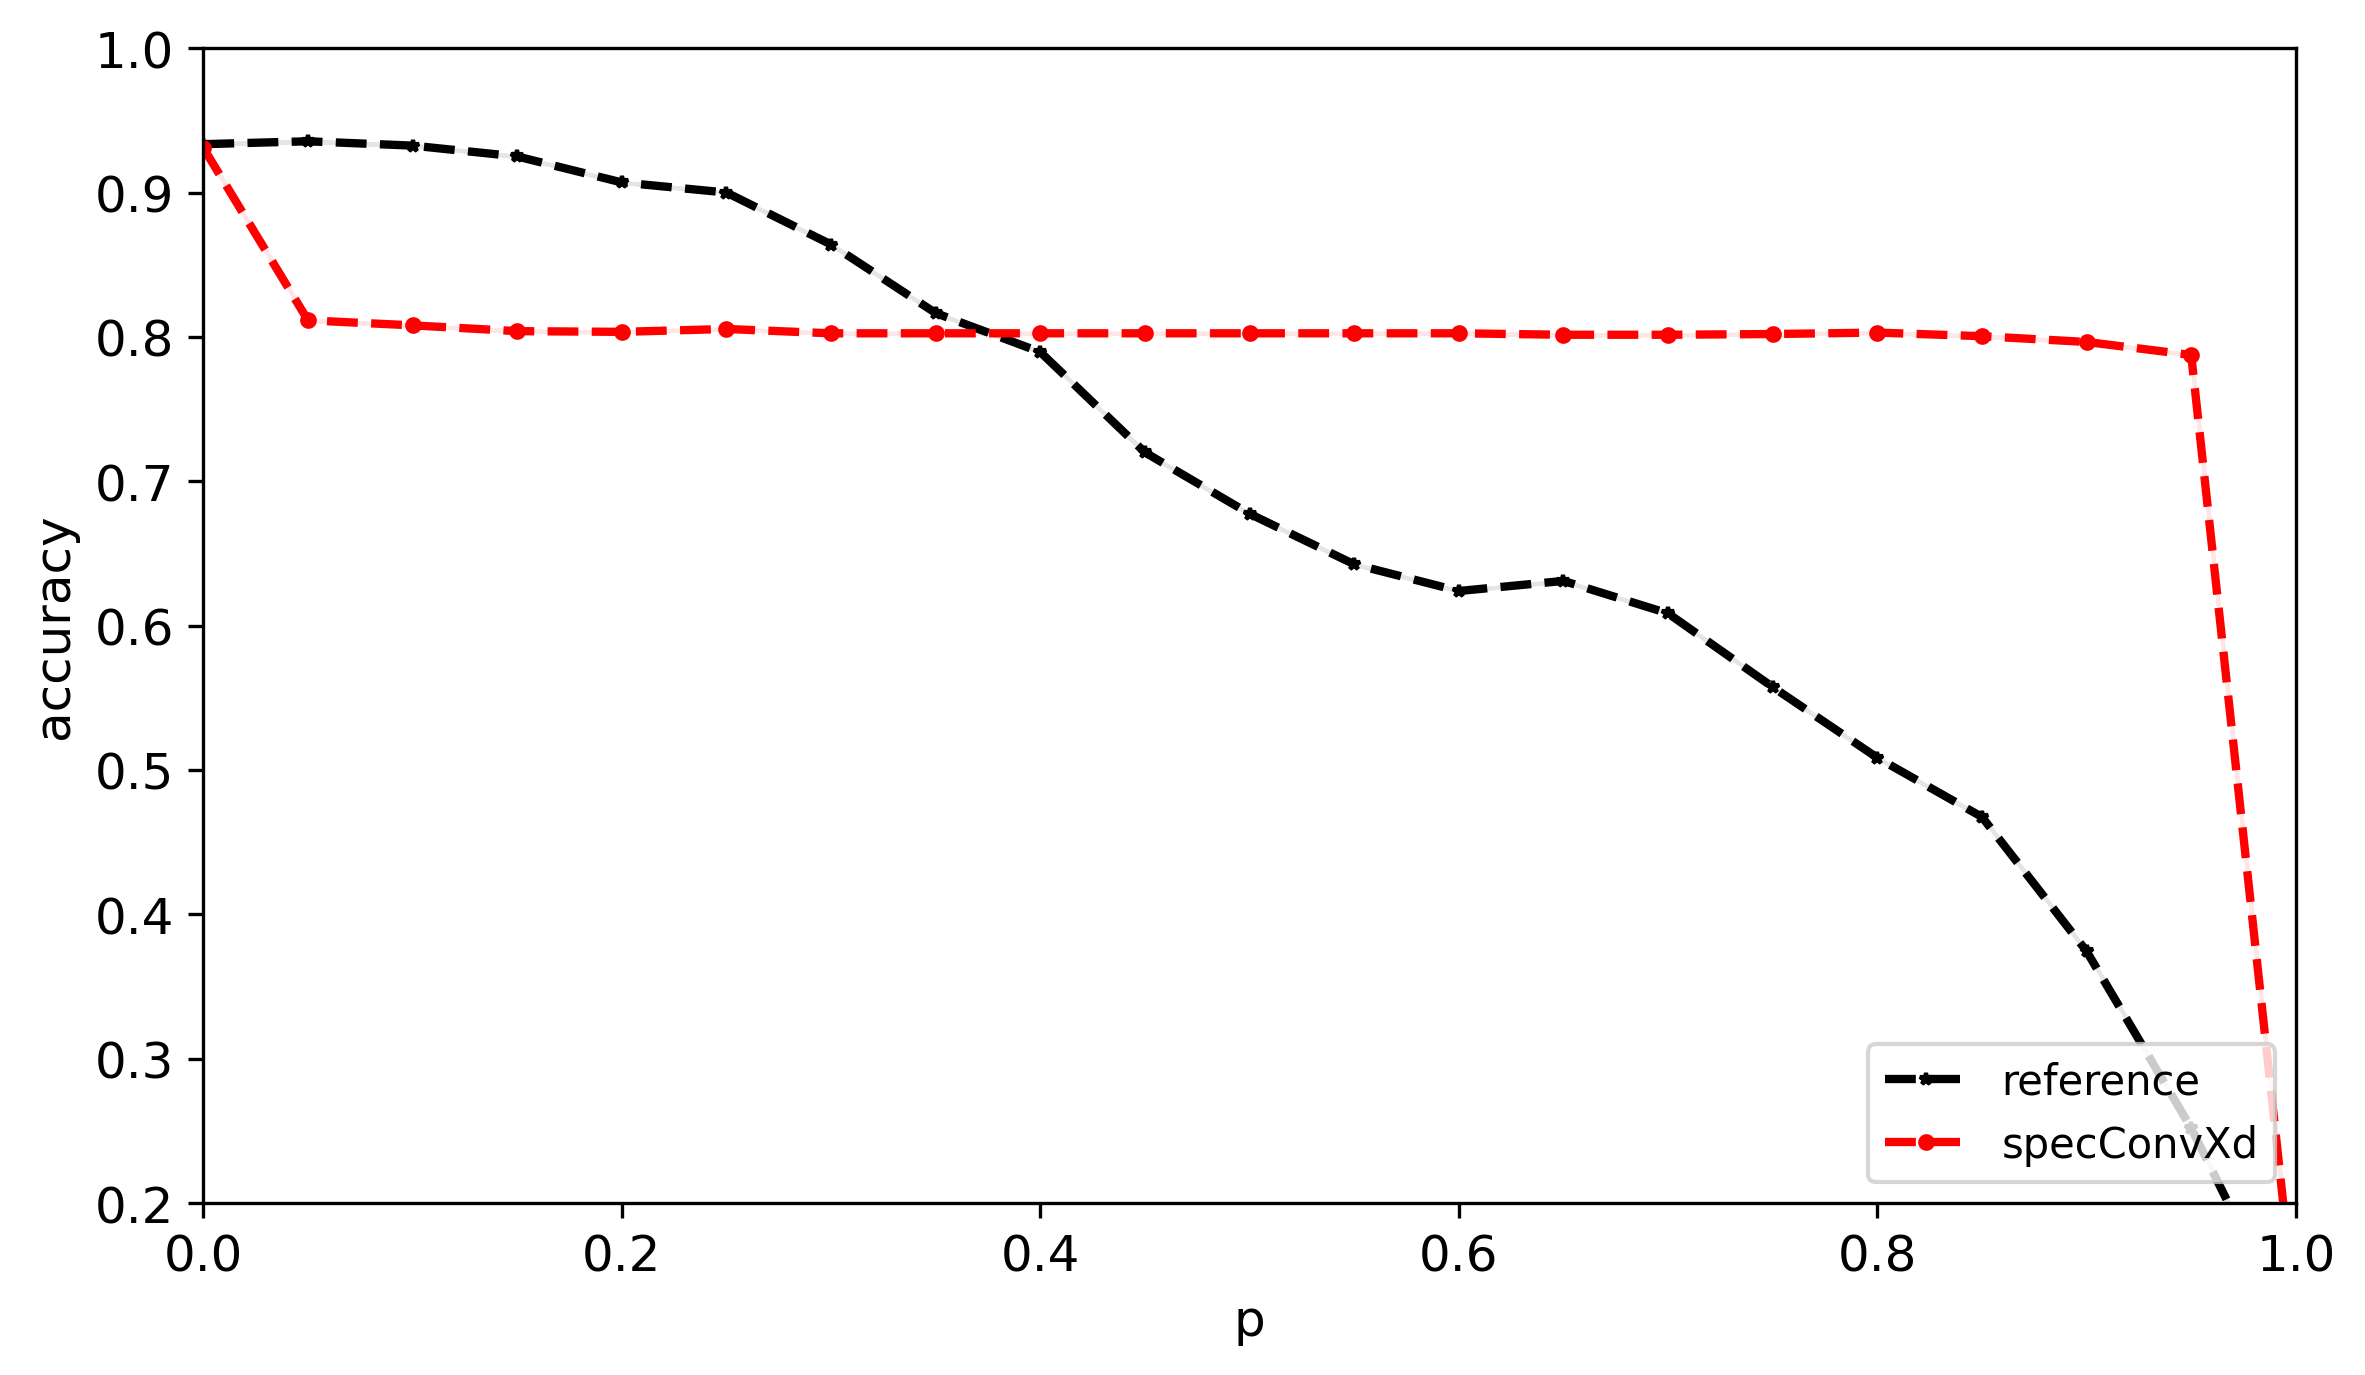

In [16]:
spc.plot_results(results,x_min=0,
            x_max=1,
            y_min=0.2,
            y_max=1.0,
            xlabel='p',
            ylabel='accuracy',
            show_fig=True,
            use_grid=False,
            markersize=3,
            percentile=True,
            save_fig=False,
            dpi=300,
            loc='lower right',
            name_fig='results')

## Pre-training

In [ ]:
models_pars.get('specConvXd').get('spectral_cnn1d_config')['trainable_phi']=True
models_pars.get('specConvXd').get('spectral_cnn1d_config')['use_lambda_in']=False

{'kernel_size': 3,
 'stride': 1,
 'padding': 1,
 'trainable_phi': False,
 'use_lambda_out': False,
 'use_lambda_in': True,
 'use_bias': True}

In [35]:
inv=2
hyperparameters['use_pruning']=False
models_pars.get('specConvXd').get('spectral_cnn1d_config')['trainable_phi']=True
models_pars.get('specConvXd').get('spectral_cnn1d_config')['use_lambda_in']=False
models = spc.SpectralCnn(hyperparameters=hyperparameters,maxpooling_config=maxpooling_config)
models.compile_models(units=2500,spectral_config=models_pars.get(models_name[inv]).get('spectral_config'),
                      spectral_cnn1d_config=models_pars.get(models_name[inv]).get('spectral_cnn1d_config'),
                      spectral_cnn2d_config=models_pars.get(models_name[inv]).get('spectral_cnn2d_config'),
                      name=models_name[inv])
models.summary(name=models_name[inv])
models.train(x_train, y_train, x_test, y_test, name=models_name[inv],verbose=1,layers=[3])

Pruning: Pershaps pre-training
specConvXd model summary:
 


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spec_conv1D (SpecCnn1D)         │ (None, 40, 20)         │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 39, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 780)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spectral_1 (Spectral)           │ (None, 2500)           │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spectral_2 (Spectral)           │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,100 (19.92 KB)

 Trainable params: 5,100 (19.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.2323 - loss: 2.2119 - val_accuracy: 0.5410 - val_loss: 1.1478
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.5809 - loss: 1.0715 - val_accuracy: 0.6310 - val_loss: 0.9278
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.6734 - loss: 0.8213 - val_accuracy: 0.6860 - val_loss: 0.8164
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.7262 - loss: 0.7117 - val_accuracy: 0.7110 - val_loss: 0.7483
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.7665 - loss: 0.6172 - val_accuracy: 0.7400 - val_loss: 0.7071
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.7930 - loss: 0.5651 - val_accuracy: 0.7645 - val_loss: 0.6418
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.8069 - loss: 0.5539 - val_accuracy: 0.7635 - val_loss: 0.6485
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.8255 - loss: 0.4820 - val_accuracy: 0.7990 - v

In [55]:
models.weigths[0][0].shape

(1, 2500)